In [22]:
import os
import zipfile
import random

import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from PIL import Image

In [2]:
project_root = "/mnt/d/AI_and_Datascience/Project/brain-turmor-hierarchical-classification"
zip_path = os.path.join(project_root, "data", "archive (1).zip")
extract_dir = os.path.join(project_root, "data")

os.makedirs(extract_dir, exist_ok=True)

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print("Giải nén hoàn tất!")
print(f"Dữ liệu đã được giải nén tại: {extract_dir}")

Giải nén hoàn tất!
Dữ liệu đã được giải nén tại: /mnt/d/AI_and_Datascience/Project/brain-turmor-hierarchical-classification/data


In [10]:
data_dir = os.path.join(project_root, "data", "brisc2025")
classification_data_path = os.path.join(data_dir, "classification_task")

train_test_size_dict = {}
print("Phân phối dữ liệu trong thư mục dành cho Phân loại U não - Classification task:")
for folder in os.listdir(classification_data_path):
    folder_dir = os.path.join(classification_data_path, folder)
    class_size_dict = {}
    for class_name in os.listdir(folder_dir):
        class_path = os.path.join(folder_dir, class_name)
        num_images = sum(1 for f in os.listdir(class_path) if f.lower().endswith((".jpg", ".jpeg", ".png")))
        class_size_dict[class_name] = num_images
    
    train_test_size_dict[folder] = class_size_dict
    
    print(f"Dữ liệu tập {folder}:\n", train_test_size_dict[folder])

Phân phối dữ liệu trong thư mục dành cho Phân loại U não - Classification task:
Dữ liệu tập test:
 {'glioma': 254, 'meningioma': 306, 'no_tumor': 140, 'pituitary': 300}
Dữ liệu tập train:
 {'glioma': 1147, 'meningioma': 1329, 'no_tumor': 1067, 'pituitary': 1457}


In [12]:
segmentation_data_path = os.path.join(data_dir, "segmentation_task")
segmentation_size_dict = {}
print("Phân phối dữ liệu trong thư mục dành cho Phân đoạn U não - Segmentation task:")
for folder in os.listdir(segmentation_data_path):
    folder_dir = os.path.join(segmentation_data_path, folder)
    image_mask_size_dict = {}
    for fol in os.listdir(folder_dir):
        fol_path = os.path.join(folder_dir, fol)
        num_images = sum(1 for f in os.listdir(fol_path) if f.lower().endswith((".jpg", ".jpeg", ".png")))
        image_mask_size_dict[fol] = num_images

    segmentation_size_dict[folder] = image_mask_size_dict

    print(f"Dư liệu tập {folder}:\n", segmentation_size_dict[folder])    

Phân phối dữ liệu trong thư mục dành cho Phân đoạn U não - Segmentation task:
Dư liệu tập test:
 {'images': 860, 'masks': 860}
Dư liệu tập train:
 {'images': 3933, 'masks': 3933}


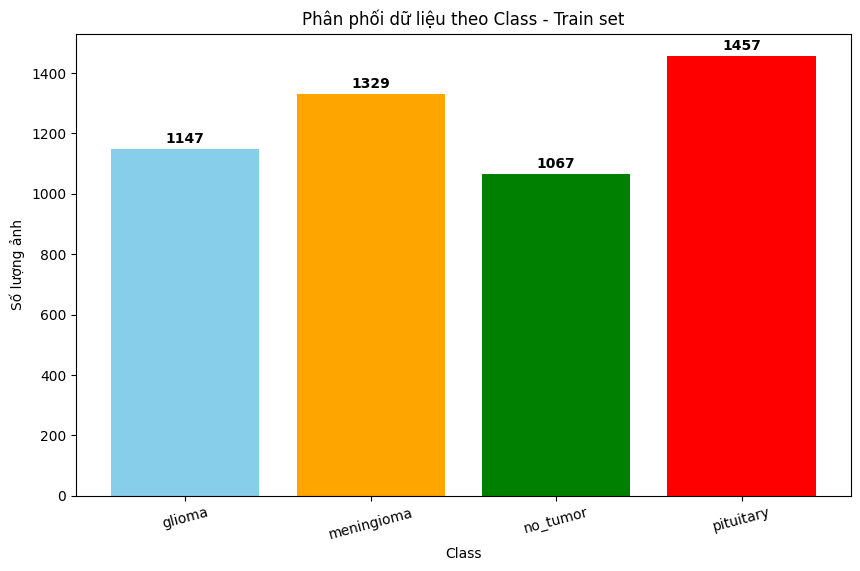

In [14]:
train_class_distribution = train_test_size_dict["train"]
classes = list(train_class_distribution.keys())
num_images = list(train_class_distribution.values())

plt.figure(figsize=(10, 6))
plt.bar(classes, num_images, color=['skyblue', 'orange', 'green', 'red'])
plt.title("Phân phối dữ liệu theo Class - Train set")
plt.xlabel("Class")
plt.ylabel("Số lượng ảnh")
plt.xticks(rotation=15)
for i, v in enumerate(num_images):
    plt.text(i, v + 20, str(v), ha='center', fontweight='bold')
plt.show()

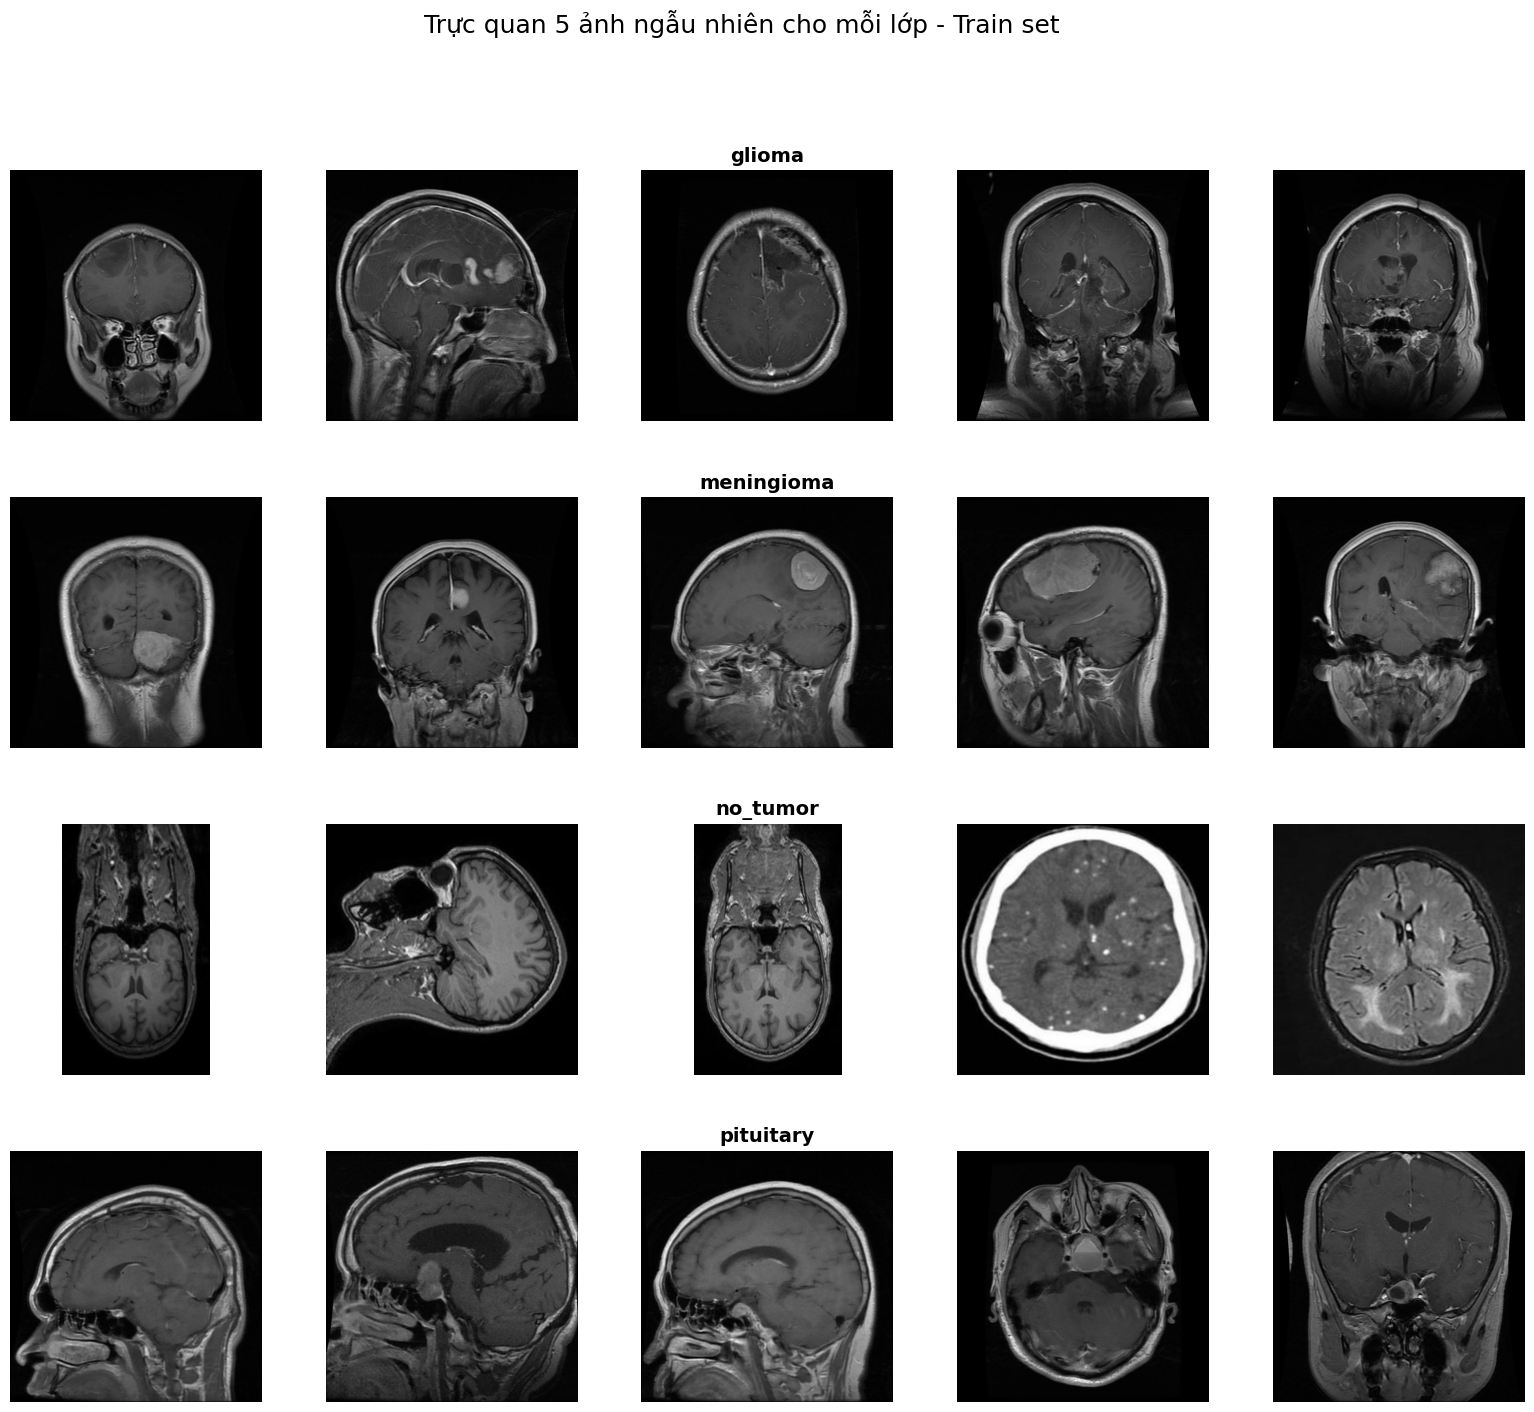

In [32]:
class_train_dir = os.path.join(classification_data_path, "train")
classes = [class_name for class_name in os.listdir(train_dir) if os.path.isdir(os.path.join(class_train_dir, class_name))]

fig = plt.figure(figsize=(20, 4*len(classes)))
gs = GridSpec(len(classes), 5, figure=fig, hspace=0.3, wspace=0.1)

for i, cls in enumerate(classes):
    cls_path = os.path.join(class_train_dir, cls)
    images = [f for f in os.listdir(cls_path) if f.lower().endswith((".jpg", ".jpeg", ".png"))]
    sample_images = random.sample(images, 5)

    for j, img_name in enumerate(sample_images):
        img_path = os.path.join(cls_path, img_name)
        img = Image.open(img_path).convert("RGB")
        ax = fig.add_subplot(gs[i, j])
        ax.imshow(img)
        ax.axis("off")
    ax_title = fig.add_subplot(gs[i, 2])
    ax_title.set_title(cls, fontsize=14, fontweight='bold')
    ax_title.axis('off')

plt.suptitle("Trực quan 5 ảnh ngẫu nhiên cho mỗi lớp - Train set", fontsize=18)
plt.show()

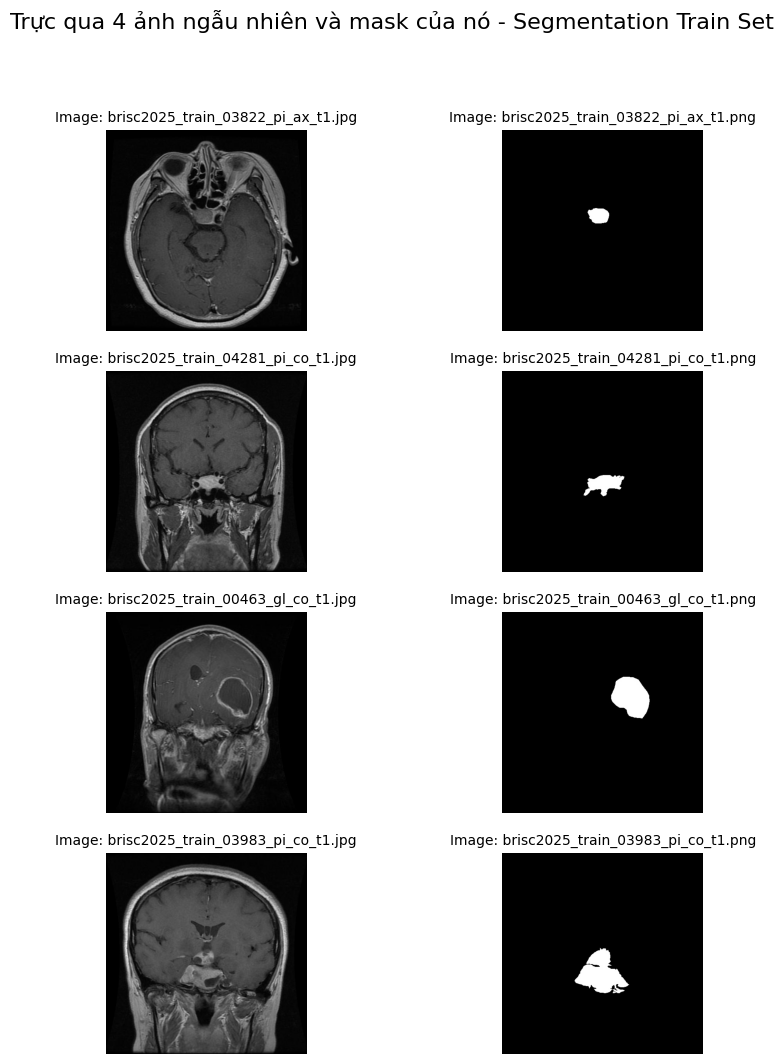

In [36]:
segment_train_img_dir = os.path.join(segmentation_data_path, "train", "images")
segment_train_mask_dir = os.path.join(segmentation_data_path, "train", "masks")

image_files = [f for f in os.listdir(segment_train_img_dir) if f.lower().endswith((".jpg", ".jpeg", ".png"))]
sample_images = random.sample(image_files, 4)

fig, axes = plt.subplots(4, 2, figsize=(10, 12))
plt.subplots_adjust(hspace=0.2, wspace=0.05)
for i, img_name in enumerate(sample_images):
    img_path = os.path.join(segment_train_img_dir, img_name)
    mask_name = os.path.splitext(img_name)[0] + ".png"
    mask_path = os.path.join(segment_train_mask_dir, mask_name)

    img = Image.open(img_path).convert("RGB")
    mask = Image.open(mask_path).convert("RGB")

    axes[i, 0].imshow(img)
    axes[i, 0].set_title(f"Image: {img_name}", fontsize=10)
    axes[i, 0].axis("off")

    axes[i, 1].imshow(mask)
    axes[i, 1].set_title(f"Image: {mask_name}", fontsize=10)
    axes[i, 1].axis("off")
plt.suptitle("Trực qua 4 ảnh ngẫu nhiên và mask của nó - Segmentation Train Set", fontsize=16)
plt.show()